$\textbf{Modelo ising}$

El modelo de ising es un modelo teorico de un magneto. La magnetización de un objeto esta cosntruido por la combinación
de pequeños dipolos magnéticos de todo el material. 

Si los dipolos se encuentran ordenados aleatoriamente, la energía total podria ser cero, pero si una linea apunta en una
dirección, o un conjunto de puntos, el sistema adquira una dirección, que da lugar al momento magnetico del material.

Matematicamente el espin, está representado por $s_i = \pm 1$

In [1]:
from random import random, randrange, seed
from math import exp, pi
from numpy import ones, copy
from pylab import plot, xlabel, ylabel, legend, imshow, figure, title

Text(0.5, 1.0, 'Configuración del espin')

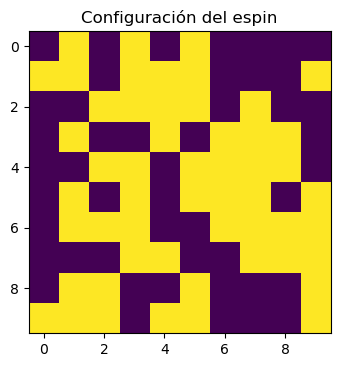

In [2]:
seed(15) # semilla
N = 10 # dimension de la malla
s = ones([N,N], int) # arreglo inicial del espin
for i in range(N): # distribución aleatoria del espin
    for j in range(N):
        if random() < 0.5 :
            s[i,j] = 1
        else:
            s[i,j] = -1

# grafica de la distribucion aleatroia del spin
figure(num=1, figsize = (4,4),dpi = 100)
imshow(s)
title('Configuración del espin')

Normalmente, se asume que los espines interactuan con sus adjcentes inmediatos, cuya energía esta dada por
\begin{equation}
E = -J\sum_{\left< ij \right > } s_is_j
\end{equation}

Donde $\left< ij \right >$ representa la suma sobre los pares i, j que son adjacentes en la malla

In [3]:
# Energía de interacción
def energy(s, Einit, J):
    N = len(s)
    E = Einit
    # doble ciclo para recorrer filas y columnas
    for i in range(N):
        for j in range(N):
            # contadores a validar
            a = j+1
            b = i-1
            c = i+1
            if  a < N:
                E  += -J*s[i,j]*s[i,a]
            if a < N and b >= 0:
                E  += -J*s[i,j]*s[b,a]
            if c < N :
                E  += -J*s[i,j]*s[c,j]   
            if c < N and a < N :
                E  += -J*s[i,j]*s[c,a]
    return(E)

In [4]:
# magnetizacion de la distrbucion de la matriz de spin
def magnet(s):
    N = len(s)
    M = 0 # magenetizacion  inicial
    for i in range(N):
        for j in range(N):
            M += s[i,j]
    return(M)

In [5]:
# para una energia inicial de cero con J = 1
Einit = 0
J = 1
E = energy(s,Einit, J)
mag = magnet(s)
print("Energía total = ",E)
print("Magnetización = ",mag)

Energía total =  -20
Magnetización =  6


se espera, que la distribución de los espines de manera aleatoria, generen una magnetización casi cero, y una energía relativamente pequeña

Si el sistema se perturba cambiando la posición de un espin de manera aleatoria, pordria esperarse que la magnetización inicie en cero y se mantenga estable bajo una cierta cantidad de iteraciones

IntProgress(value=0, description='Loading:')

-236


Text(0, 0.5, 'M(magnetización)')

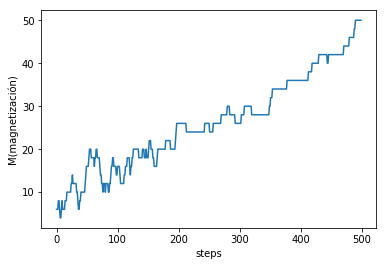

In [6]:
import ipywidgets as wg
from IPython.display import display
import time
progress = wg.IntProgress(description='Loading:')
progress.orientation='horizontal' # or vertical
display(progress)

steps = 500
T = 1
J = 1
Mag = []
for i in range(steps):
    change = [randrange(N),randrange(N)]
    aux = copy(s)
    aux[change[0],change[1]] = -1*aux[change[0],change[1]]
    dE = energy(aux,E,J)-energy(s,E,J)
    if random() < exp(-dE):
        s = copy(aux)
        E += dE
    Mag.append(magnet(s))
    progress.value = i*100/steps
    #time.sleep(0.00005) # speed CONTROLLER
print(E)
plot(Mag)
xlabel('steps')
ylabel('M(magnetización)')


Apartir de 2000(valor del eje horizontal) la magentizacion se satura con un valor de 100(unidades arbitrarias 'ua') dado que contiene 100 elementos

Text(0.5, 1.0, 'Configuración del espin')

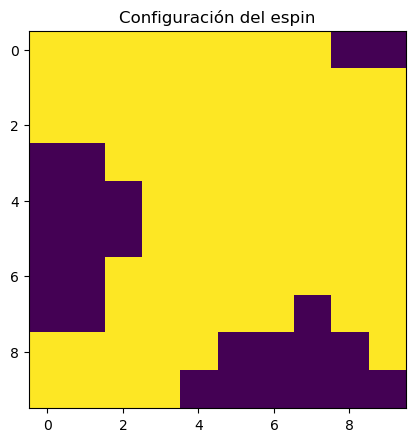

In [7]:
figure(num=1, figsize = (5,5),dpi = 100)
imshow(s)
title('Configuración del espin')

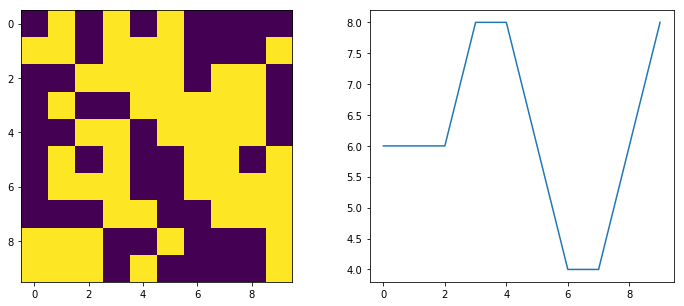

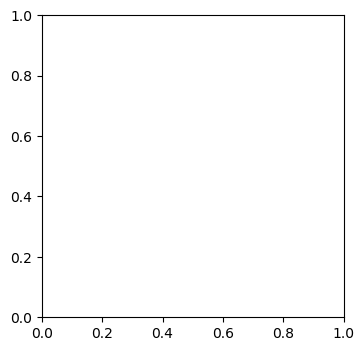

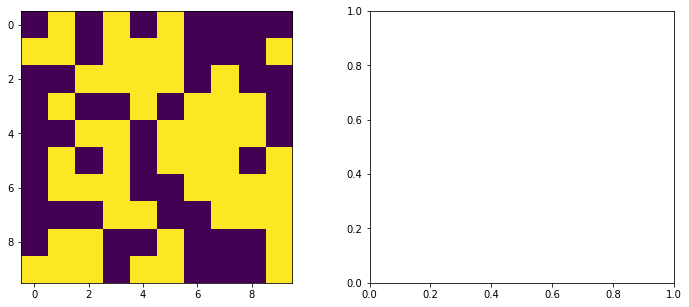

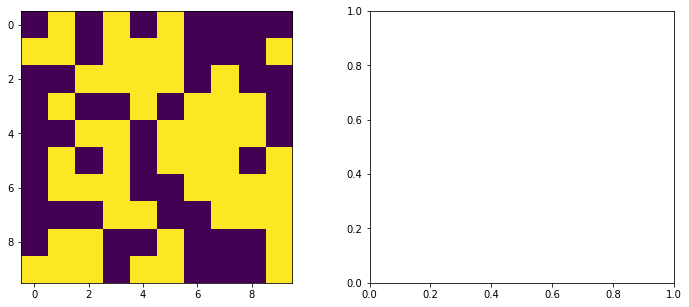

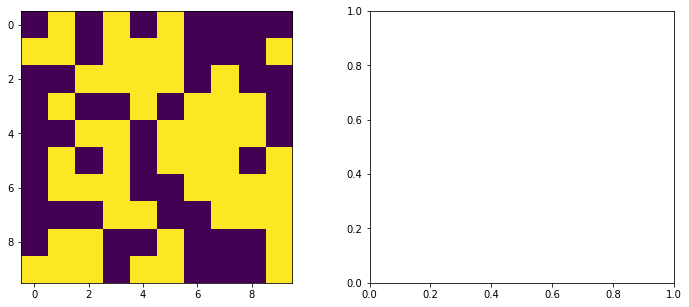

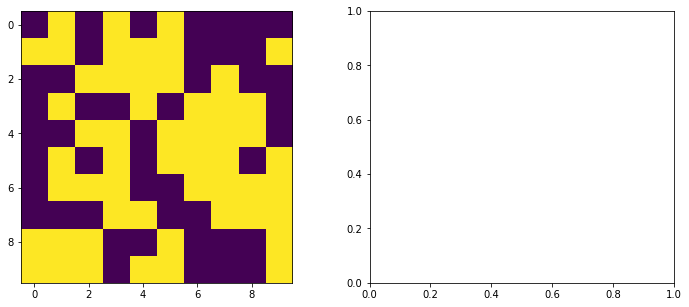

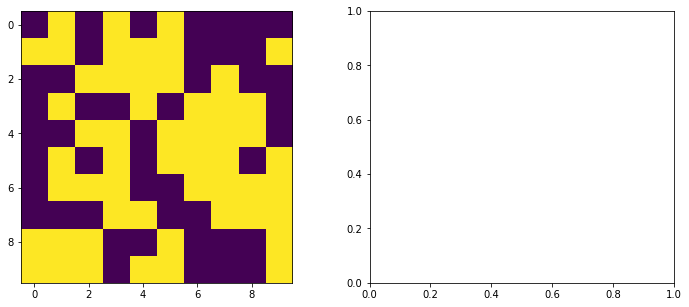

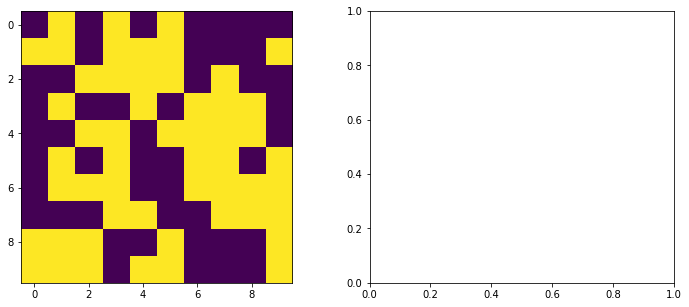

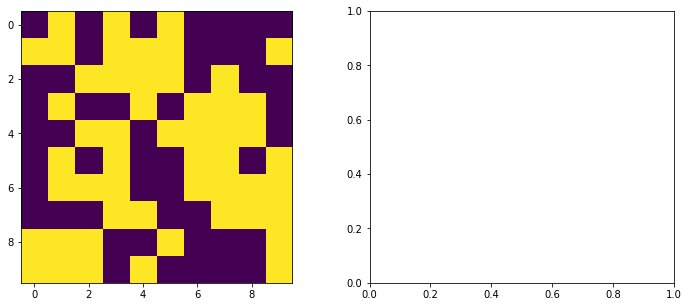

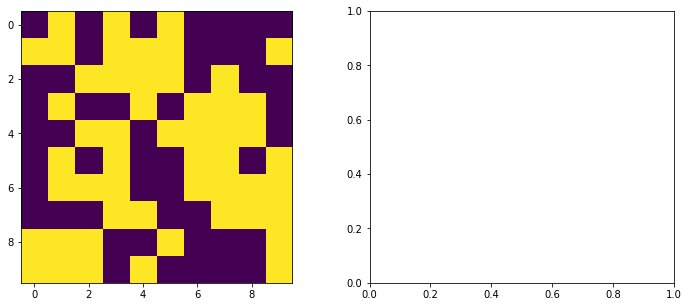

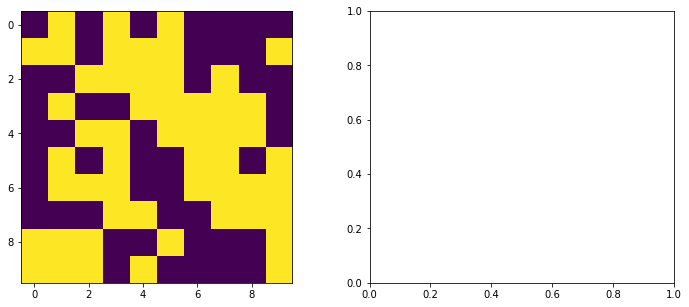

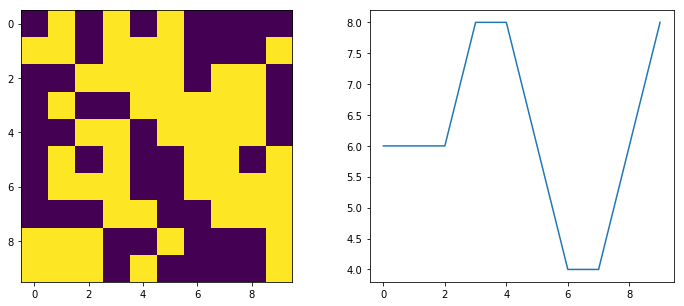

In [12]:
# forma dinamica de la matriz de spin y la magnetización

import matplotlib.pyplot as plt
from IPython import display

seed(15) # semilla
N = 10 # dimension de la malla
s = ones([N,N], int) # arreglo inicial del espin
for i in range(N): # distribución aleatoria del espin
    for j in range(N):
        if random() < 0.5 :
            s[i,j] = 1
        else:
            s[i,j] = -1

# grafica de la distribucion aleatroia del spin
figure(num=1, figsize = (4,4),dpi = 100)
imshow(s)
title('Configuración del espin')
# para una energia inicial de cero con J = 1
Einit = 0
J = 1
E = energy(s,Einit, J)
mag = magnet(s)
print("Energía total = ",E)
print("Magnetización = ",mag)
steps = 10
T = 1
J = 1
Mag = []
for i in range(steps):
    change = [randrange(N),randrange(N)]
    aux = copy(s)
    aux[change[0],change[1]] = -1*aux[change[0],change[1]]
    dE = energy(aux,E,J)-energy(s,E,J)
    if random() < exp(-dE):
        s = copy(aux)
        E += dE
    Mag.append(magnet(s))
    plt.gca().cla()
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(12,5)
    ax[0].imshow(s)
    ax[1].plot(Mag)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    #time.sleep(0.001)
    #time.sleep(0.00005) # speed CONTROLLER